## Import libs

In [56]:
from __future__ import print_function, division, absolute_import
import os
import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.ndimage import gaussian_filter1d
from scipy import signal
import sys
sys.path.insert(0,'../..')
print(sys.path)
from mtfunc.helper import *
import safeopt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import tqdm
# plt.style.use('science')


['../..', '../..', '../..', '../..', '/Users/adrianpaeckelripoll/rbc-parameter-tuning/fig_scripts/optimizer_eval', '/opt/anaconda3/envs/env1/lib/python39.zip', '/opt/anaconda3/envs/env1/lib/python3.9', '/opt/anaconda3/envs/env1/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages/IPython/extensions', '/Users/adrianpaeckelripoll/.ipython', '/Users/adrianpaeckelripoll/rbc-parameter-tuning/mtfunc']


In [57]:

rnd_opt_cst=get_data('NL_opt/mrnd_opt_cst_spring_3_1_2_2022_03_16_1143.npy')
rnd_opt_par=get_data('NL_opt/mrnd_opt_par_spring_3_1_2_2022_03_16_1143.npy')
violations=get_data('violations/spring1143_violations.npy')
rnd_opt_cst=np.delete(rnd_opt_cst,violations,axis=0)
rnd_opt_par=np.delete(rnd_opt_par,violations,axis=0)

# Evaluation 

False
[1.0, 0.5, 1.0, 2.0, 1.0, 0.5, 0.5, 0.5, 2.0, 1.0, 2.0, 2.0]
False
beta: 0.5 par_num 4


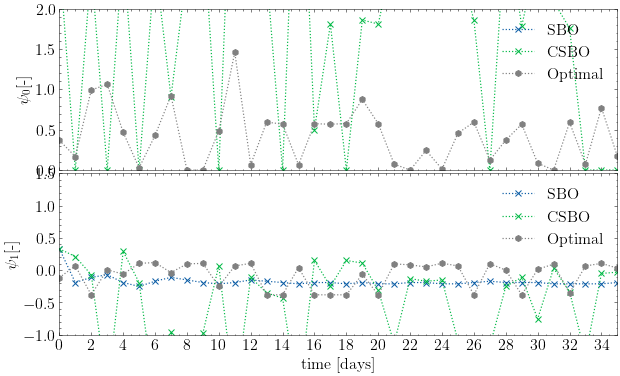

[ 7.36007347  4.10953726  0.31755679  2.17497038  6.59170915  2.37265621
 -3.14554095 -2.37342865  3.07025142  2.4396341   3.55758223 -2.00919312
 -2.61633464  2.69498098  2.49001387  3.22168864 -0.57019652  1.96883435
  2.18046319 -2.51005438  2.15696061  3.08137905 -1.99726515  2.57714528
  2.4749637  -0.60958891 -3.69457095 -1.81567179 10.44713624  2.2049591
  2.95860655  2.06680216  2.10855988  3.35456021 -1.23614474 -3.93995083] 36 36
[ 7.36007347  4.19964502  1.07365478 -4.37925587  7.87858547 -4.2008849
 -3.83755245 -4.14087444 -1.73888087 -2.01261298  3.19535396 -3.28306498
 -2.00802711  1.35926331 -4.54237372 -1.40315209  2.54364124  1.80961447
  1.47385218  2.97912154  1.36509505 -1.01943129 -1.32716924  2.91708563
  3.47962988 -1.94482649 -4.332029   -4.11927747  9.92809733  2.25561654
 -1.39346027  6.42712071  1.56899221 -4.367259   -2.61029149 -2.31581846] 36 36


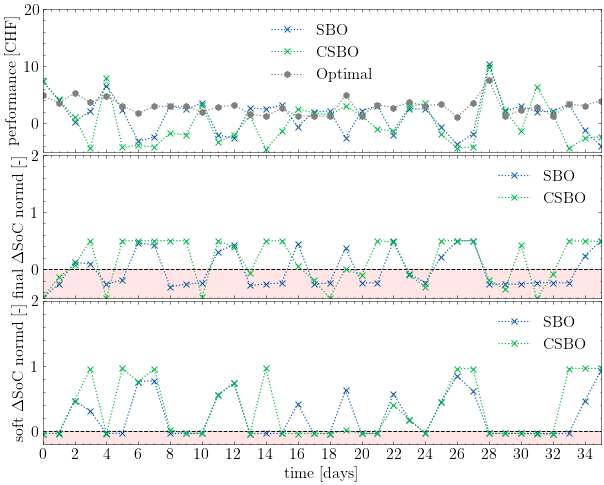

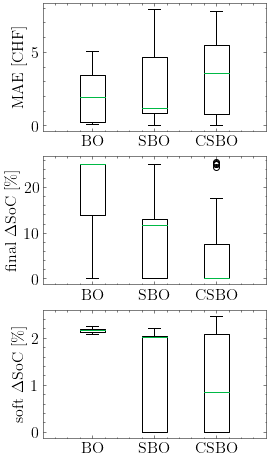

beta: 1 par_num 4


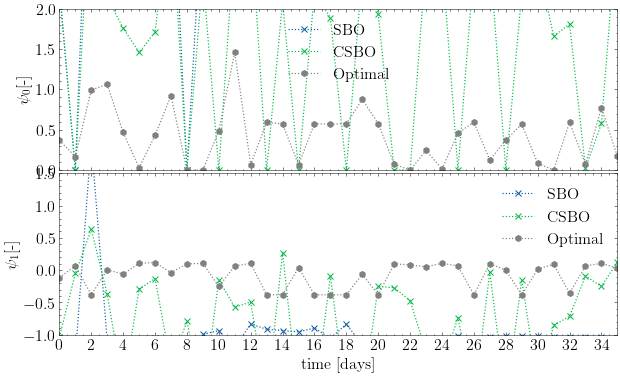

[ 4.38116039 -4.26728824  5.23189011 -1.51915133  2.10911552 -1.29941208
 -3.61367809 -3.663623   -4.32960512 -2.02273209 -0.46648909 -2.98858001
 -3.50804958 -1.53873282 -1.66573429 -0.87871734 -0.74870523 -2.21003218
 -1.84228316 -3.16800859 -1.87907881 -1.01926992 -2.09208505 -0.71793973
 -1.62394131 -1.94455388 -3.78922011 -2.11958862  6.36616091 -1.9447073
 -1.42773546 -2.03009917 -1.91879065 -0.74366392 -2.54156937 -4.0285658 ] 36 36
[ 4.38116039 -2.81981598  5.23530593 -1.44111315 -4.47243997  2.02519201
 -2.56784417 -3.68106522 -4.32826712 -2.07425051 -5.09398302 -2.99181094
 -3.51166602 -4.70044054  1.3949304  -4.59735608 -2.60238736  2.11444506
 -4.72098523 -3.43919927  1.80466885 -4.35652221 -4.21725834 -0.71800405
 -1.5127729  -4.22083109 -4.19987702 -0.37527361 -2.35572157  2.26332592
 -1.46550559 -1.68804668 -1.24742648 -3.6125977  -3.49932003  0.62234704] 36 36


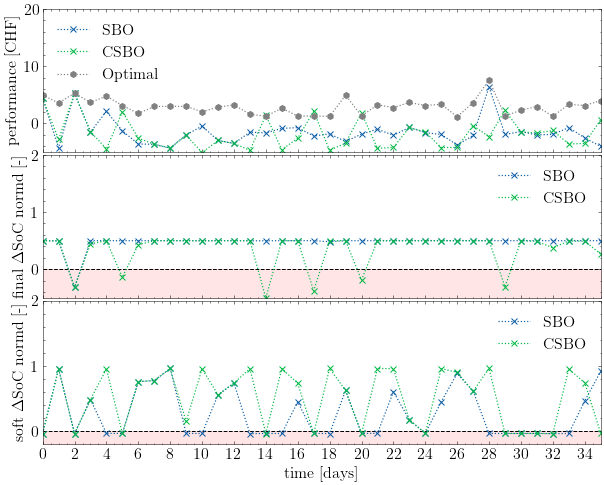

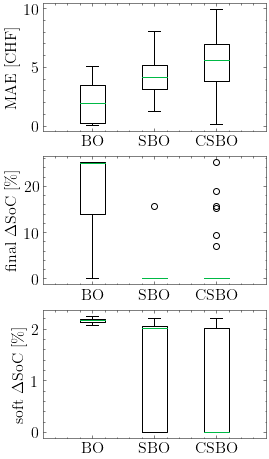

beta: 2 par_num 4


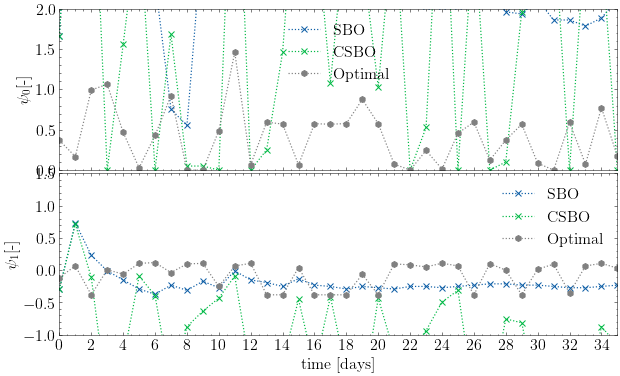

[ 7.58066799  7.98680004  5.25570934  3.33055957  7.25578932  2.02154243
 -3.62539258 -3.72325751 -0.95615756  2.79220963  3.03667324  1.42728707
 -2.61633464  2.62638883  2.00956483  4.62112138 -0.80759799  1.47166871
  1.48736963 -3.11847975  1.63044979  2.32133933 -2.19564693  1.88126274
  1.8905079  -1.0211067  -3.8658094  -2.1248855  10.63379253  1.93325708
  2.45183902  1.66068794  1.92145184  2.76885027 -1.90410139 -4.10342281] 36 36
[ 7.58066799  7.98691148  0.31755679 -4.41015912 -1.74143593  4.95012622
 -4.17116611 -4.28064408 -4.32840276 -4.28955968 -4.46274405 -0.12032161
 -4.23941389 -4.51797308 -4.24351062  1.16293967 -0.79517318  0.89121394
 -2.04206662 -3.43919927  0.6698684  -1.02946841 -4.22016764 -4.24686859
  0.07271461 -4.22945654 -3.9696685  -4.30069953 -2.34881383 -1.77854768
 -1.86229541 -2.15895569 -4.70174394 -1.13684479 -2.54187583 -4.13979991] 36 36


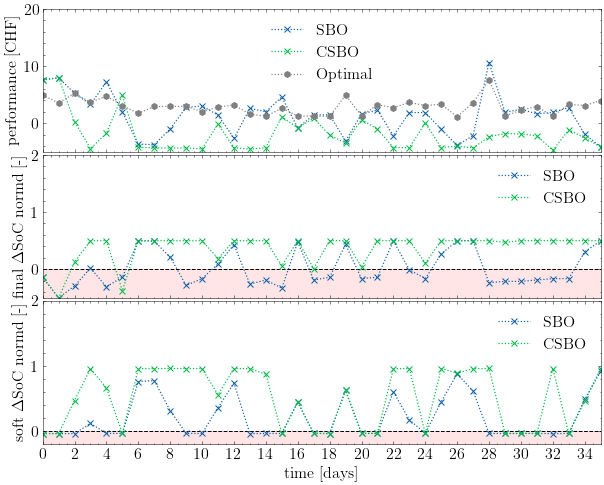

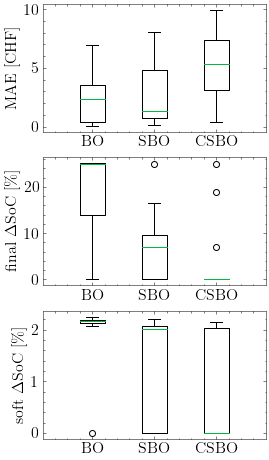

In [59]:
height=8
height2=6
hp_list=[4]
tlim=35
for n in hp_list:
    import glob
    paths=glob.glob(f'sim_data_312_spring_rp0_qf_55_qs_32_model2/x_post_loglike{n}*')
    file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
    betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
    for i, beta in enumerate(betas):
        if beta.startswith('0'):
            betas[i]=float(beta.replace('0.','.'))
        else:
            betas[i]=float(beta) # convert to float and add . to 05

    optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
    dates=[file_path[-19:-4] for file_path in file_paths] # get betas

    par=[]
    for i,path in enumerate(paths):
        par.append(get_data(path))



    par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
    par_df=par_df.set_index(['beta','optype']).sort_index()
    print(np.any(par_df.index.duplicated()))
    par_df=par_df[~par_df.index.duplicated()]

    paths=glob.glob(f'sim_data_312_spring_rp0_qf_55_qs_32_model2/y_post_loglike{n}*')
    file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
    betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
    for i, beta in enumerate(betas):
        if beta.startswith('0.'):
            betas[i]=float(beta.replace('0.','.'))
        elif beta.startswith('0'):
            betas[i]=float(beta.replace('0','.'))       
        else:
            betas[i]=float(beta) # convert to float and add . to 05

    optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
    dates=[file_path[-19:-4] for file_path in file_paths] # get betas


    ct=10 #convergence time
    mae_=[]
    mae=[]
    cnst10=[]
    cnst0=[]
    cnst20=[]
    cnst15=[]
    cnst5=[]
    cts=[]
    cnst_hist=[]
    cnst_=[]
    sft_=[]
    cst_=[]
    for i,path in enumerate(paths):
        cst=get_data(path)[:]
        cst_.append(cst)
        err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
        mae_.append(np.abs(err))
        mae.append(np.abs(err).sum()/(len(cst)-ct))

        cnst=get_data(path)[:,1]
        sft=get_data(path)[:,2]        
        cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
        cnst10.append((cnst<-2e-2).astype(int).sum())
        cnst[cnst>0]=0
        cnst_.append(-cnst*50)
        sft[sft>0]=0
        sft_.append(-sft*50)        

    print(betas)
    eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'cst_':cst_,'mae':mae,'mae_':mae_,'hst':cnst_hist,'date':dates,
                         'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_})
    eval_df=eval_df.set_index(['beta','optype']).sort_index()
    print(np.any(eval_df.index.duplicated()))
    eval_df=eval_df[~eval_df.index.duplicated()]
    betas_list=[0.5,1,2]
    for beta in betas_list:
        print('beta:',beta,'par_num',n)
        model_label=['SBO','CSBO','BO']
        marker=['^','o','s']

        #Parameter plot
        with plt.style.context('science'):
            plt.rcParams.update({'font.size': 16})                        
            err=25e-2
            iterations=len(par_df.loc[(beta,'CSBO'),'par'][:,0])
            fig,ax=plt.subplots(2,sharex=True,figsize=(10,height2))
            for col,m in zip(model_label,marker):
                ax[0].plot(range(iterations),par_df.loc[(beta,col),'par'][:,0],':x',label=col,linewidth=1.2)
                ax[1].plot(range(iterations),par_df.loc[(beta,col),'par'][:,1],':x',label=col,linewidth=1.2)
            ax[0].plot(range(iterations),rnd_opt_par[:iterations,0],':h',label='Optimal',linewidth=1.2,color='grey')
            ax[1].plot(range(iterations),rnd_opt_par[:iterations,1],':h',label='Optimal',linewidth=1.2,color='grey')
            ax[0].set_xticks(np.arange(0,iterations,2))
            ax[0].set_ylim([0,2])
            ax[1].set_ylim([-1,1.5])
            ax[0].set_ylabel(r'$\psi_0$[-]')
            ax[0].legend()    
            ax[1].set_ylabel(r'$\psi_1$[-]')
            ax[1].legend()

            plt.xlabel('time [days]')
            plt.xlim([0,tlim])
            plt.subplots_adjust(hspace=0.02)
#             plt.savefig(f'QsQf/{n}_par_rp_b0_qs_32_qf_55_beta_{beta}.pdf')
            plt.show()
        # Performance and constraint plots    
        with plt.style.context('science'):
            err=25e-2
            plt.rcParams.update({'font.size': 16})            
            iterations=len(eval_df.loc[(beta,'CSBO'),'cst_'][:,0])
            fig,ax=plt.subplots(3,sharex=True,figsize=(10,height))
            for col,m in zip(model_label,marker):
                print(eval_df.loc[(beta,col),'cst_'][:,0],iterations,len(eval_df.loc[(beta,col),'cst_'][:,0]))
                ax[0].plot(np.arange(iterations),eval_df.loc[(beta,col),'cst_'][:,0],':x',label=col,linewidth=1.2)
                ax[1].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,1],':x',label=col,linewidth=1.2)
                ax[2].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,2],':x',label=col,linewidth=1.2)
            ax[0].plot(range(iterations),-rnd_opt_cst[:iterations,0],':h',label='Optimal',linewidth=1.2,color='grey')
            ax[1].hlines(0,0,iterations,'k',linestyles='--')
            ax[1].fill_between(range(iterations),y1=0,y2=-1,color='red',alpha=0.1)
            ax[2].hlines(0,0,iterations,'k',linestyles='--')
            ax[2].fill_between(range(iterations),y1=0,y2=-1,color='red',alpha=0.1)            
        #     ax[1].plot(range(iterations),rnd_opt_cst[:iterations,1],':h',label='Optimal',linewidth=1.2,color='grey')
            ax[0].set_xticks(np.arange(0,iterations,2))
            ax[0].set_ylabel(r'performance [CHF]')
            ax[0].legend()    
            ax[0].set_ylim([-5,20])            
            ax[1].set_ylim([-0.5,2])
            ax[2].set_ylim([-0.2,2])            
            ax[1].set_ylabel(r'final $\Delta$SoC normd [-]')
            ax[1].legend()
            ax[2].set_ylabel(r'soft $\Delta$SoC normd [-]')
            ax[2].legend()

            plt.xlabel('time [days]')
            plt.xlim([0,tlim])
            plt.subplots_adjust(hspace=0.02)
#             plt.savefig(f'QsQf/{n}_prf_rp_b0_qs_32_qf_55_beta_{beta}.pdf')
            plt.show()
        model_label=['BO','SBO', 'CSBO']
        model_names=[ 'BO','SBO', 'CSBO']
        # MAE and violation boxplots
        with plt.style.context('science'):
            plt.rcParams.update({'font.size': 16})            
            fig,ax=plt.subplots(3,1,figsize=(4,height))
            for i,col in enumerate(model_label): 
                ax[0].boxplot(eval_df.loc[(beta,col)].mae_,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[0].set_ylabel(r'MAE [CHF]')
                ax[0].set_xlim([-0.2,0.7]) 
                ax[1].boxplot(eval_df.loc[(beta,col)].cnst_,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[1].set_ylabel(r'final $\Delta$SoC [\%]')
                ax[1].set_xlim([-0.2,0.7]) 
                ax[2].boxplot(eval_df.loc[(beta,col)].sft_,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[2].set_ylabel(r'soft $\Delta$SoC [\%]')     
                ax[2].set_xlim([-0.2,0.7]) 
#                 plt.ylim([-0.001,None])
    #             plt.yscale('log')
            #     plt.ylabel(r'$\textrm{R}^2$')
    #         plt.locator_params(axis="y", nbins=5) 
    #         plt.margins(tight=True)  
        #     plt.legend(['beta'])
#             plt.savefig(f'QsQf/{n}_model_mae_qs_qf_boxplot_beta_{beta}.pdf')
            plt.show()

In [40]:
eval_df

cst_       mae  \
beta optype                                                                
0.5  BO      [[4.351351331687267, 0.4813949352742813, 0.098...  3.060254   
     CSBO    [[-4.330347069243126, 0.4992869089898895, 0.94...  3.025465   
     SBO     [[-5.318674320155102, 0.4981169247557935, 1.09...  1.756162   
     SBOb    [[6.374569182699611, -0.004644619101102166, -0...  4.072332   
1.0  BO      [[7.350299523825257, -0.5010059796475806, -0.0...  1.405192   
     CSBO    [[-5.273509709970744, 0.4983776538995781, 1.09...  3.498166   
     SBO     [[-5.273509709970744, 0.4983776538995781, 1.09...  2.499437   
     SBOb    [[-5.13970701059276, 0.49865488801676777, 1.09...  4.972974   
2.0  BO      [[4.364793997008964, 0.48139309975394184, 0.09...  3.237052   
     CSBO    [[-4.3923336530371095, 0.49917436681035554, 0....  4.552306   
     SBO     [[-4.3923336530371095, 0.49917436681035554, 0....  4.221122   
     SBOb    [[2.7280088445124835, 0.419259169189782, 0.213...  4.802051   

                                                          mae_  \
beta optype                                                      
0.5  BO      [0.4987001696710611, 0.46515686165715797, 0.94...   
     CSBO    [5.009640922514605, 4.991713958019925, 2.49481...   
     SBO     [0.5952592819327012, 0.7287497526698123, 0.133...   
     SBOb    [5.807920924318086, 4.476870380831011, 1.05422...   
1.0  BO      [3.9861048856759727, 4.021458238113277, 0.8589...   
     CSBO    [1.3171922597579222, 1.500577428198008, 0.9627...   
     SBO     [0.6423645562826263, 0.258402677564995, 0.4877...   
     SBOb    [8.477755919089017, 4.6262336511357525, 6.3898...   
2.0  BO      [0.38667358403997376, 3.2627644777716283, 0.91...   
     CSBO    [4.320169648722507, 4.381133481140266, 1.93759...   
     SBO     [4.320169648722507, 4.381133481140266, 2.05787...   
     SBOb    [4.832926476099054, 7.254725269083798, 6.49288...   

                                                           hst  \
beta optype                                                      
0.5  BO      ([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,...   
     SBO     ([2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,...   
     SBOb    ([2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0,...   
1.0  BO      ([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0,...   
     CSBO    ([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,...   
     SBO     ([0, 0, 2, 4, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2,...   
     SBOb    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,...   
2.0  BO      ([2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,...   
     CSBO    ([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     SBO     ([0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0,...   
     SBOb    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,...   

                        date  cnst10  \
beta optype                            
0.5  BO      2022_03_17_0021      26   
     CSBO    2022_03_21_0522      15   
     SBO     2022_03_17_0021      18   
     SBOb    2022_03_21_0522       9   
1.0  BO      2022_03_21_0530      47   
     CSBO    2022_03_17_0015      12   
     SBO     2022_03_17_0015      18   
     SBOb    2022_03_17_0015       5   
2.0  BO      2022_03_16_2354      28   
     CSBO    2022_03_21_0536       6   
     SBO     2022_03_21_0536       8   
     SBOb    2022_03_21_0536       4   

                                                         cnst_  \
beta optype                                                      
0.5  BO      [-0.0, 19.923858494421076, 1.26194459859137, 2...   
     CSBO    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....   
     SBO     [-0.0, -0.0, -0.0, -0.0, 9.2860340769438, 2.44...   
     SBOb    [0.2322309550551083, -0.0, -0.0, -0.0, -0.0, -...   
1.0  BO      [25.050298982379033, 25.023548992012007, 25.08...   
     CSBO    [-0.0, -0.0, -0.0, -0.0, 2.6530486744798907, -...   
     SBO     [-0.0, -0.0, -0.0, -0.0, 2.65304867447989

In [10]:
rnd_opt_cst

array([-4.91731151, -5.27538299, -5.28031395, -3.64979409, -4.76792194,
       -3.10862008, -1.74784869, -2.94834513, -2.70290025, -2.84379299,
       -3.22465086, -1.85054437, -2.78219696, -3.03611593, -2.64503674,
       -4.01545761, -1.813474  , -3.25534176, -4.92152545, -2.4401855 ,
       -1.94405559, -2.62521417, -4.10613088, -3.24049355, -3.55078662,
       -2.56945697, -2.15447134, -3.64875073, -3.11717867, -3.34196489,
       -2.05011191, -2.24633969, -2.6072351 , -1.56104645, -3.62781857,
       -2.82199475, -3.47457066, -1.77905094, -1.67216197, -1.69919705,
       -1.39612187, -3.89805753, -0.91154609, -7.60438208, -3.32419666,
       -3.10831105, -3.99228299, -1.39661874, -1.28685993])

In [35]:
eval_df.reset_index().sft_[0]

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])

In [64]:
hp1=get_data(f'sim_data_312_winter_rp0_qf_55_qs_32_model/hyperpar_loglike1_b0.5__2022_03_15_0849.npy')
print(hp1)
hp1=get_data(f'sim_data_312_winter_rp0_qf_55_qs_32_model/hyperpar_loglike2_b0.5__2022_03_15_0811.npy')
print(hp1)
hp1=get_data(f'sim_data_312_winter_rp0_qf_55_qs_32_model/hyperpar_loglike3_b0.5__2022_03_15_0754.npy')
print(hp1)
hp1=get_data(f'sim_data_312_winter_rp0_qf_55_qs_32_model/hyperpar_loglike4_b0.5__2022_03_15_0833.npy')
print(hp1)
hp1=get_data(f'sim_data_312_winter_rp0_qf_55_qs_32_model/hyperpar_loglike5_b0.5__2022_03_20_0626.npy')
print(hp1)

[4.2848999999999995 list([0.292, 0.144]) 0.04000000000000001
 list([0.266, 0.149]) 0.0625 list([0.163, 0.118]) 0.5 0.7 2.13 0.566]
[3.4225000000000003 list([0.355, 0.17]) 0.07896100000000002
 list([0.412, 0.231]) 0.042435999999999995 list([0.181, 0.167]) 0.5 0.3
 0.824 0.67]
[3.4225000000000003 list([0.355, 0.17]) 0.04000000000000001
 list([0.266, 0.149]) 0.0625 list([0.163, 0.118]) 0.5 0.7 2.13 0.566]
[2.25 list([0.32, 0.2]) 0.04000000000000001 list([0.3, 0.1]) 0.0625
 list([0.184, 0.135]) 0.5 0.7 2.13 0.566]
[9.796899999999999 list([0.486, 0.247]) 0.08761599999999999
 list([0.896, 0.279]) 0.038025 list([0.161, 0.11]) 2 0.486 0.227 0.344]


In [67]:
hp_list=[1,2,3,4]
tlim=50
height=8
height2=6

import glob
paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_model/x_post_*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))       
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas

par=[]
for i,path in enumerate(paths):
    par.append(get_data(path))



par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
par_df=par_df.set_index(['beta','optype']).sort_index()
print(np.any(par_df.index.duplicated()))
# par_df=par_df[~par_df.index.duplicated()]

paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_model/y_post*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
hpar=[file_path.split('_')[2].strip('b') for file_path in file_paths] # get hp names
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))        
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas
ct=10 #convergence time
mae_=[]
mae=[]
cnst10=[]
cnstavg=[]
sftavg=[]
cts=[]
cnst_hist=[]
cnst_=[]
sft_=[]
cst_=[]
for i,path in enumerate(paths):
    cst=get_data(path)[:]
    cst_.append(cst)
    err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
    mae_.append(np.abs(err))
    mae.append(np.abs(err).mean())
    cnst=get_data(path)[:,1]
    sft=get_data(path)[:,2]        
    cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
    cnst10.append((cnst<-2e-2).astype(int).sum())
    cnst[cnst>0]=0
    cnst_.append(-cnst*50)
    cnstavg.append(cnst.mean()*50)
    sft[sft>0]=0
    sft_.append(-sft*50) 
    sftavg.append(sft.mean()*50)


eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'mae':mae,'cnst':cnstavg,'sft':sftavg,'cst_':cst_,'mae_':mae_,'hst':cnst_hist,'date':dates,
                     'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_,'hpar':hpar})
eval_df=eval_df.set_index(['beta','optype']).sort_index()
print(np.any(eval_df.index.duplicated()))
# eval_df=eval_df[~eval_df.index.duplicated()]


True
True


In [68]:
eval_df.sort_values('mae')

mae       cnst       sft  \
beta optype                                  
0.5  CSBO    0.335519  -1.203868 -1.036670   
     SBO     0.341826  -1.268368 -1.614520   
     CSBO    0.342068  -1.625381  0.000000   
     CSBO    0.408856  -1.088000 -1.068939   
2.0  CSBO    0.419779  -0.492090 -0.466997   
1.0  BO      0.435745 -24.641636 -2.108998   
     BO      0.435745 -24.641636 -2.108998   
0.5  BO      0.440616 -24.647583 -2.109234   
1.0  BO      0.442224 -24.651863 -2.109354   
0.5  BO      0.445817 -24.657374 -2.110496   
     BO      0.445817 -24.657374 -2.110496   
1.0  SBO     0.546467  -1.357614 -1.490405   
     CSBO    0.563638  -1.157480 -0.309778   
2.0  SBO     0.649150  -0.436940 -1.508731   
1.0  CSBO    0.674939  -1.781284 -0.113114   
0.5  CSBO    0.699149  -2.313640 -0.213950   
1.0  SBO     0.712122  -2.470726  0.000000   
0.5  SBO     0.714034  -1.081333 -1.586372   
2.0  CSBO    0.714144  -1.000897  0.000000   
0.5  SBO     0.734728  -3.711878  0.000000   
2.0  CSBO    0.737933  -1.239314 -0.409012   
1.0  CSBO    0.743239  -0.436333 -0.617335   
2.0  SBO     0.750048  -1.340742 -1.403473   
0.5  CSBO    0.754654  -2.090261 -0.211711   
2.0  BO      0.769265 -21.283679 -2.119730   
1.0  CSBO    0.863069  -1.637912  0.000000   
     BO      0.884901 -16.761522  0.000000   
2.0  BO      0.911653 -21.551897 -2.127826   
     BO      0.911653 -21.551897 -2.127826   
     SBO     0.937554  -1.873986  0.000000   
     BO      0.979064 -18.873005 -2.069692   
1.0  CSBO    0.988328  -1.907306 -0.238866   
0.5  BO      1.075890 -22.637272  0.000000   
     SBO     1.106064  -3.832892 -0.298967   
     BO      1.128332 -15.848704 -1.987049   
2.0  BO      1.134009 -18.479234  0.000000   
     CSBO    1.139407  -1.865861 -0.244699   
1.0  BO      1.229475 -19.423077 -2.033871   
0.5  SBO     1.290349  -3.336847 -0.243714   
1.0  SBO     1.337025  -3.790979 -0.340509   
2.0  CSBO    1.524882  -1.067224 -0.068139   
     SBO     1.548107  -2.748777 -0.360292   
     SBO     1.670572  -2.089335 -0.632792   
1.0  SBO     1.966689  -3.664191 -0.160008   
     SBO     2.048217  -3.122871 -0.133930   
     SBOb    2.183434  -0.815269  0.000000   
0.5  SBOb    2.476175  -1.195512  0.000000   
2.0  SBOb    3.301415  -1.078900  0.000000   
0.5  SBOb    4.210570  -2.016102 -0.731850   
     SBOb    4.367987  -2.307504 -0.728391   
1.0  SBOb    4.447220  -1.083604 -0.476252   
     SBOb    4.455076  -2.051231 -0.289083   
0.5  SBOb    4.494330  -0.488646 -0.416961   
1.0  SBOb    4.585044  -1.450716 -0.376900   
0.5  SBOb    4.626645  -0.564032 -0.445772   
2.0  SBOb    4.635592  -0.659921 -0.258988   
     SBOb    4.674137  -0.889764 -0.374969   
     SBOb    4.805541  -0.735356 -0.204964   
1.0  SBOb    4.850151  -1.107812 -0.364007   
2.0  SBOb    4.873218  -0.729364 -0.224427   

                                                          cst_  \
beta optype                                                      
0.5  CSBO    [[-4.509002670493637, 0.49869236627122576, 0.9...   
     SBO     [[-4.509002670493637, 0.49869236627122576, 0.9...   
     CSBO    [[-4.542108426810266, 0.49935526282657006, 1.0...   
     CSBO    [[-4.542359627080834, 0.49943966567556347, 0.9...   
2.0  CSBO    [[-4.540943691007371, 0.4991120858955614, 0.95...   
1.0  BO      [[-1.9735311822432884, 0.4993124462134446, -0....   
     BO      [[-1.9735311822432884, 0.4993124462134446, -0....   
0.5  BO      [[-1.9628737928844862, 0.4993123681134861, -0....   
1.0  BO      [[-1.9521919327661443, 0.49931236000508616, -0...   
0.5  BO      [[-1.9735356572332252, 0.4993124524395051, -0....   
     BO      [[-1.9735356572332252, 0.4993124524395051, -0....   
1.0  SBO     [[-4.540732009307701, 0.49921563131164903, 0.9...   
     CSBO    [[-4.5620112359632135, 0.4984318642861601, 0.9...   
2.0  SBO     [[-4.540943691007371, 0.4991120858955614, 0.95...   
1.0  CSBO    [[-4.659192294246759, 0.49786153383114196, 0.9...   
0.5  CSBO    [[-4.637237801448587, 0.498190

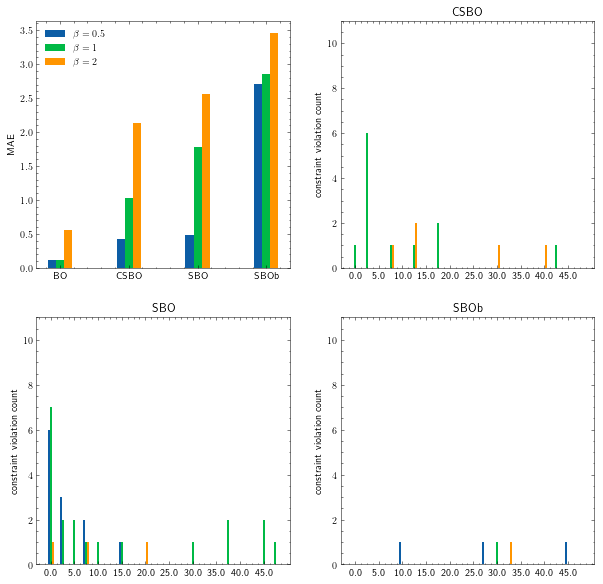

In [149]:
with plt.style.context('science'):
    x = np.arange(len(eval_df.index.levels[1]))  # the label locations
    width = 0.35  # the width of the bars

    fig, axes = plt.subplots(2,2,figsize=(10,10))
    rects1 = axes[0,0].bar(x - width/3, eval_df.loc[0.5].mae, width/3, label=r'$\beta=0.5$')
    rects2 = axes[0,0].bar(x , eval_df.loc[1].mae, width/3, label=r'$\beta=1$',tick_label=eval_df.index.levels[1])
    rects3 = axes[0,0].bar(x + width/3, eval_df.loc[2].mae, width/3, label=r'$\beta=2$')
    axes[0,0].set_ylabel('MAE')
    axes[0,0].legend()
    n_bins=20
    x = np.arange(len(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:]))  # the label locations
    for i,ax in enumerate(axes.flatten()[1:]):
        width=0.5
        op=eval_df.index.levels[1][i+1]
        rects1 = ax.bar(x - width/3, eval_df.loc[(0.5,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=0.5$')
        rects2 = ax.bar(x , eval_df.loc[(1,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=1$',
                        tick_label=(np.abs(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:])*100).round(1)[::-1])
        rects3 = ax.bar(x + width/3, eval_df.loc[(2,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=2$')
        ax.set_xticks(np.arange(0,n_bins,2))
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('constraint violation count')
        ax.set_ylim([0,11])
        ax.set_title(op)
    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)
    # ax.bar_label(rects3, padding=3)

#     fig.tight_layout()
#     axes[1,1].set_xlim([10,30])
# plt.savefig('../fig_scripts/eval_mae_cnstviol_rp_qf55_loglike3_.png')
plt.show()

In [ ]:
with plt.style.context('science'):
    x = np.arange(len(eval_df.index.levels[1]))  # the label locations
    width = 0.35  # the width of the bars

    fig, axes = plt.subplots(1,3,figsize=(15,5))
    rects1 = axes[0].bar(x - width/3, eval_df.loc[0.5].mae, width/3, label=r'$\beta=0.5$')
    rects2 = axes[0].bar(x , eval_df.loc[1].mae, width/3, label=r'$\beta=1$',tick_label=eval_df.index.levels[1])
    rects3 = axes[0].bar(x + width/3, eval_df.loc[2].mae, width/3, label=r'$\beta=2$')
    axes[0].set_ylabel('MAE')
    axes[0].legend()
    axes[0].set_xlabel('optimizer')

    n_bins=10
    x = np.arange(len(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:]))  # the label locations
    for i,ax in enumerate(axes.flatten()[1:]):
        width=0.5
        op=eval_df.index.levels[1][i+1]
        rects1 = ax.bar(x - width/3, eval_df.loc[(0.5,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=0.5$')
        rects2 = ax.bar(x , eval_df.loc[(1,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=1$',
                        tick_label=(np.abs(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:])*100).round().astype(int)[::-1])
        rects3 = ax.bar(x + width/3, eval_df.loc[(2,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=2$')
        ax.set_xticks(np.arange(0,n_bins,2))
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('constraint violation count')
        ax.set_ylim([0,11])
        ax.set_title(op)
        ax.set_xlabel('bin [\%]')

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)
    # ax.bar_label(rects3, padding=3)

#     fig.tight_layout()
#     axes[1,1].set_xlim([10,30])
# plt.savefig('../fig_scripts/eval_mae_cnstviol_rp_qf55_loglike3.png')
plt.show()

In [ ]:
with plt.style.context('science'):
    n_bins=20
    x = np.arange(len(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:]))  # the label locations
    width = 0.35  # the width of the bars

    fig, axes = plt.subplots(3,figsize=(5,5))
    for i,ax in enumerate(axes.flatten()):
        op=eval_df.index.levels[1][i+1]
        rects1 = ax.bar(x - width/3, eval_df.loc[(0.5,op)].hst[0][-n_bins:], width/3, label=r'$\beta=0.5$')
        rects2 = ax.bar(x , eval_df.loc[(1,op)].hst[0][-n_bins:], width/3, label=r'$\beta=1$',
                        tick_label=(np.abs(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:])*100).round(1))
        rects3 = ax.bar(x + width/3, eval_df.loc[(2,op)].hst[0][-n_bins:], width/3, label=r'$\beta=2$')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('count')
        ax.set_title(op)
        # ax.set_xticks(eval_df.index.levels[1].values)
        ax.legend()

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)
    # ax.bar_label(rects3, padding=3)

    fig.tight_layout()

plt.show()

In [129]:
eval_df.index.levels[1]

Index(['BO', 'CSBO', 'SBO', 'SBOb'], dtype='object', name='optype')

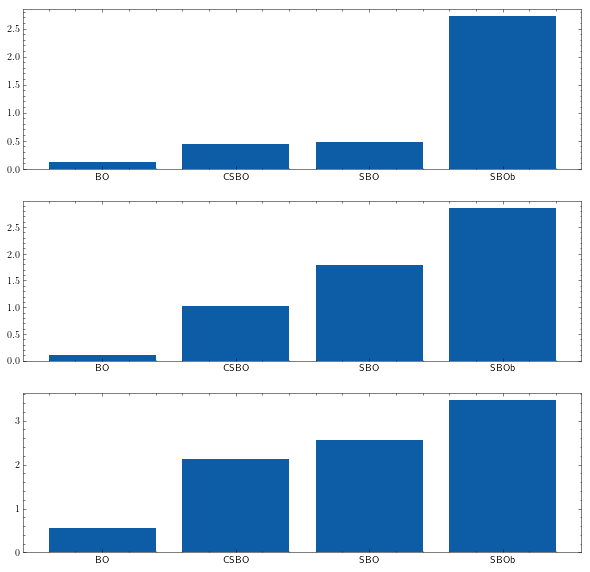

In [103]:
with plt.style.context('science'):
    fig,axes=plt.subplots(len(eval_df.index.levels[0]),figsize=(10,10))
    for i,ax in enumerate(axes.flatten()):
        df=eval_df.loc[eval_df.index.levels[0][i]]
        ax.bar(df.index,df.mae)

plt.show()

# GP evaluation

In [3]:
gps_b2=get_data('sim_data_312_winter_rp0_qf_55/CSBO_loglike3_b2__2022_03_08_0450')
gps_b05=get_data('sim_data_312_winter_rp0_qf_55/CSBO_loglike3_b05__2022_03_08_044')
bounds = [(0., 4.),(-1,1)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 100) 
optb2=safeopt.SafeOpt(gps_b2[1],parameter_set,fmin=0,num_contexts=1)
optb05=safeopt.SafeOpt(gps_b05[1],parameter_set,fmin=0,num_contexts=1)

This is local package in rbc-parameter-tuning
This is local package in rbc-parameter-tuning


3 3 1
context_fixed_inputs:  [(2, 0.0)]
3 3 1
context_fixed_inputs:  [(2, 1.0)]
3 3 1
context_fixed_inputs:  [(2, 0.0)]
3 3 1
context_fixed_inputs:  [(2, 1.0)]


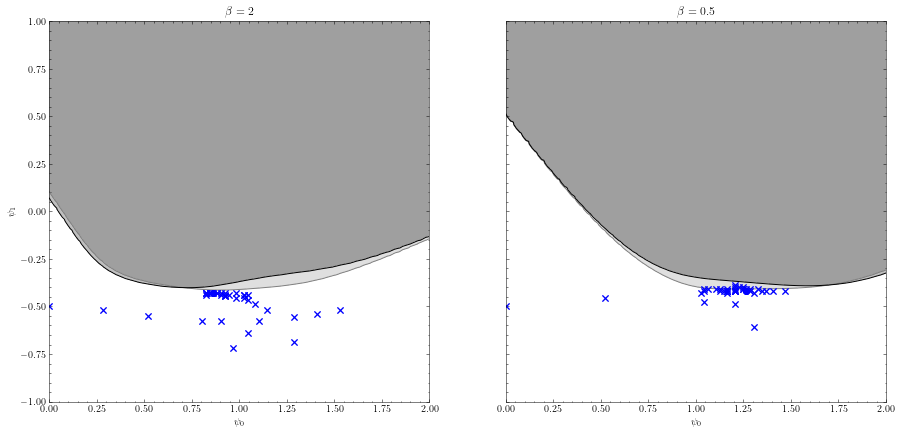

In [91]:
with plt.style.context('science'):
    fig,ax=plt.subplots(1,2,figsize=(15,7),sharey=True)
    optb2.context=[[0]]
    optb2.plot(100,levels=[-1,0,1],figure=fig,axis=ax[0], colors='grey',colorbar=False)
    optb2.context=[[1]]
    optb2.plot(100,levels=[-1,0,1],figure=fig,axis=ax[0],colors='black',colorbar=False)
    optb05.context=[[0]]
    optb05.plot(100,levels=[-1,0,1],figure=fig,axis=ax[1], colors='grey',colorbar=False)
    optb05.context=[[1]]
    optb05.plot(100,levels=[-1,0,1],figure=fig,axis=ax[1],colors='black',colorbar=False)
    ax[0].set_xlim([0,2])
    ax[1].set_xlim([0,2])
    ax[0].set_title(r'$\beta =2$')
    ax[1].set_title(r'$\beta =0.5$')
    ax[0].set_xlabel(r'$\psi_{0}$')
    ax[0].set_ylabel(r'$\psi_{1}$')    
    ax[1].set_xlabel(r'$\psi_{0}$')
    ax[1].set_title(r'$\beta =0.5$')
plt.savefig('../fig_scripts/qf_const_ctxt_loglike4.png')    
plt.show()

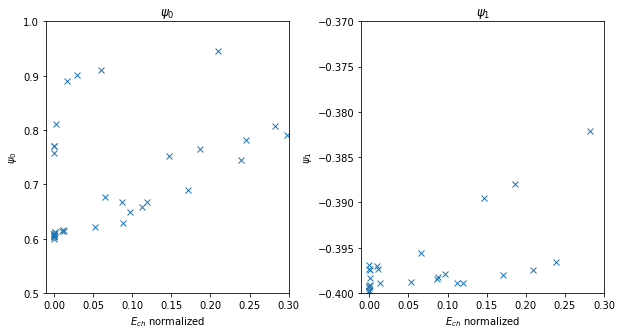

In [175]:
rnd_opt_cst=get_data('NL_opt/rnd_opt_cst_winter_3_1_2_2022_03_02_0252.npy')
rnd_opt_par=get_data('NL_opt/rnd_opt_par_winter_3_1_2_2022_03_02_0252.npy')
e_ch=get_data('sim_data_312_winter_rp0_qf_55/ech_winter_2022_03_08_0707.npy')
# rnd_opt_par=rnd_opt_par[~np.isnan(rnd_opt_par)]

fig,ax=plt.subplots(1,2,figsize=(10,5))
with plt.style.context('science'):
    ax[0].plot(e_ch[:len(rnd_opt_par)],rnd_opt_par[:,0],'x')
    ax[1].plot(e_ch[:len(rnd_opt_par)],rnd_opt_par[:,1],'x')
    ax[0].set_xlim([-0.01,0.3])
    ax[1].set_xlim([-0.01,0.3])
    ax[0].set_ylim([0.5,1])
    ax[1].set_ylim([-0.4,-0.37])
    ax[0].set_title(r'$\psi_0$')
    ax[0].set_xlabel(r'$E_{ch}$ normalized')
    ax[0].set_ylabel(r'$\psi_{0}$')    
    ax[1].set_xlabel(r'$E_{ch}$ normalized')
    ax[1].set_ylabel(r'$\psi_{1}$')
    ax[1].set_title(r'$\psi_1$')
plt.subplots_adjust(wspace=0.3)
plt.savefig('../fig_scripts/par_ech_corr_winter.png')

In [56]:
gps_b2=get_data('sim_data_312_winter_rp0_qf_55_qs_32_model/CSBO_loglike4_b2__2022_03_15_0838')
gps_b05=get_data('sim_data_312_winter_rp0_qf_55_qs_32_model/CSBO_loglike4_b0.5__2022_03_15_0833')

gps_b2_=get_data('sim_data_312_winter_rp0_qf_55_qs_32_model/SBO_loglike4_b2__2022_03_15_0838')
gps_b05_=get_data('sim_data_312_winter_rp0_qf_55_qs_32_model/SBO_loglike4_b0.5__2022_03_15_0833')

bounds = [(0., 4.),(-1,1)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 100) 
opt_ucb=safeopt.SafeOpt(gps_b05,parameter_set=parameter_set,fmin=[-np.inf,-0,0], threshold=np.array([-np.inf,-50,-50]),beta=0.5,num_contexts=1)
opt_ucb_=safeopt.SafeOpt(gps_b05_,parameter_set=parameter_set,fmin=[-np.inf,-0,0], threshold=np.array([-np.inf,-50,-50]),beta=0.5)

This is local package in rbc-parameter-tuning
This is local package in rbc-parameter-tuning


In [57]:
res=[]
ctxts=np.arange(0,0.5,0.05)
for ctxt in ctxts:
    res.append(opt_ucb.get_maximum(context=ctxt,beta_estimate=1)[0])    

In [58]:
optpar_=opt_ucb_.get_maximum(context=ctxt,beta_estimate=1)[0]

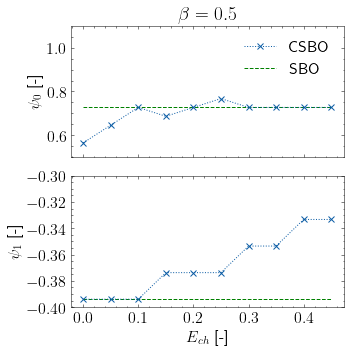

In [60]:
optpar=np.vstack(res)
opt_ucb_.get_maximum(context=ctxt,beta_estimate=1)[0]
with plt.style.context('science'):
    plt.rcParams.update({'font.size': 16})     
    fig,ax=plt.subplots(2,figsize=(5,5),sharex=True)
    ax[0].plot(ctxts,optpar[:,0],'x:',label='CSBO')
    ax[0].hlines(optpar_[0],0,ctxts[-1],label='SBO',linestyles='--',color='green')
    ax[1].plot(ctxts,optpar[:,1],'x:',label='$\psi_1$') 
    ax[1].hlines(optpar_[1],0,ctxts[-1],label='SBO',linestyles='--',color='green')    
    ax[0].set_ylabel('$\psi_0$ [-]')
    ax[1].set_ylabel('$\psi_1$ [-]')  
    ax[1].set_xlabel('$E_{ch}$ [-]')
    ax[0].set_title(r'$\beta=0.5$')
    ax[0].legend()
    ax[0].set_ylim([0.5,1.1])
    ax[1].set_ylim([-0.4,-0.3])
    
plt.tight_layout()
plt.savefig('CSBO_par_ctxt_ll4b05.pdf')
plt.show()

In [61]:
res

[array([ 0.52525253, -0.33333333]),
 array([ 0.60606061, -0.37373737]),
 array([ 0.64646465, -0.37373737]),
 array([ 0.68686869, -0.37373737]),
 array([ 0.68686869, -0.35353535]),
 array([ 0.72727273, -0.35353535]),
 array([ 0.76767677, -0.35353535]),
 array([ 0.76767677, -0.35353535]),
 array([ 0.80808081, -0.35353535]),
 array([ 0.76767677, -0.33333333])]